In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timedelta

In [2]:
%%bash
cd ..
time python covid_data.py


real	0m13.191s
user	0m11.692s
sys	0m0.355s


In [3]:
covid_data = pd.read_pickle("../data/nyt_enriched.pkl", compression="bz2")

In [24]:
def filter_df(fips_code: str,
              from_date: pd.Timestamp,
              thru_date: pd.Timestamp
             ):
    temp_df = covid_data[(covid_data['fips'] == fips_code) & (covid_data['date'] >= from_date) & (covid_data['date'] <= thru_date)].copy()     #.query(f"fips == {fips_code}").copy()
    return temp_df


def plot_fips(fips_code: str,
              from_date: pd.Timestamp,
              thru_date: pd.Timestamp
             ):
    df = filter_df(fips_code, from_date, thru_date)
    plt.figure(figsize=(16,9))
    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
#     ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    locator = mdates.DayLocator(interval=10)
    ax.xaxis.set_major_locator(locator)
#     plt.locator_params(axis='x', nbins=10)
    plt.plot(df.date, df.daily_cases)
    plt.plot(df.date, df.avg_daily_cases)
    plt.show()
    return


In [25]:
thru_date = pd.Timestamp(date.today() - timedelta(days=1))
thru_date

Timestamp('2021-01-07 00:00:00')

In [26]:
from_date = pd.Timestamp(thru_date - timedelta(days=90))
from_date

Timestamp('2020-10-09 00:00:00')

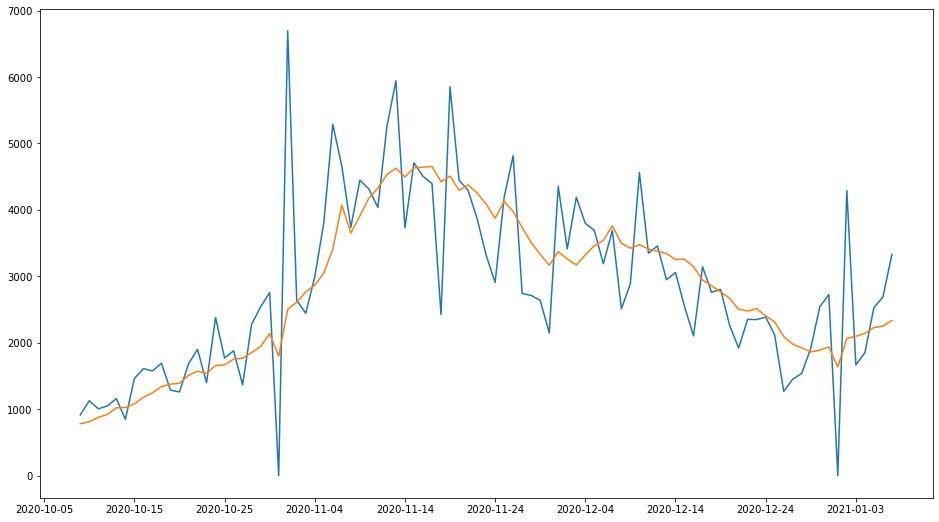

In [27]:
# cook county
fips_code = '17031'

plot_fips(fips_code, from_date, thru_date)

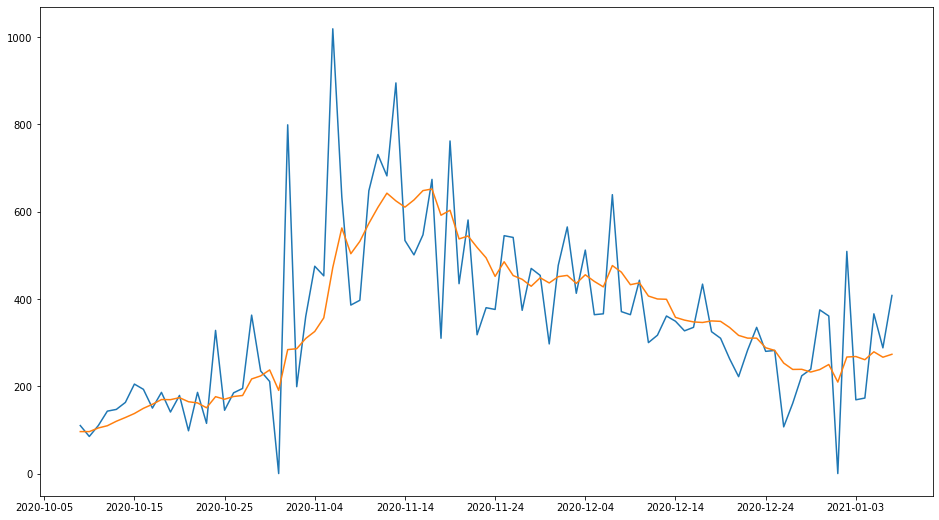

In [28]:
# lake county
fips_code = '17097'

plot_fips(fips_code, from_date, thru_date)

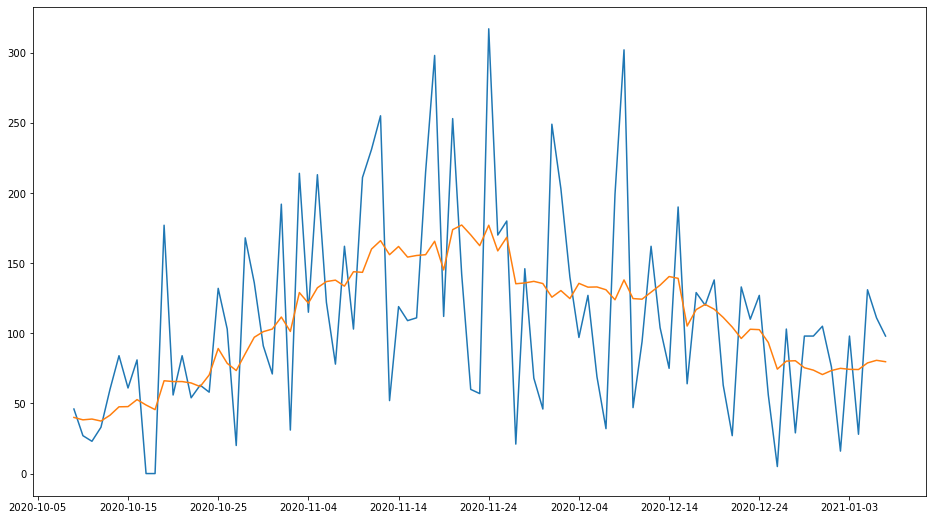

In [29]:
# kenosha county
fips_code = '55059'

plot_fips(fips_code, from_date, thru_date)

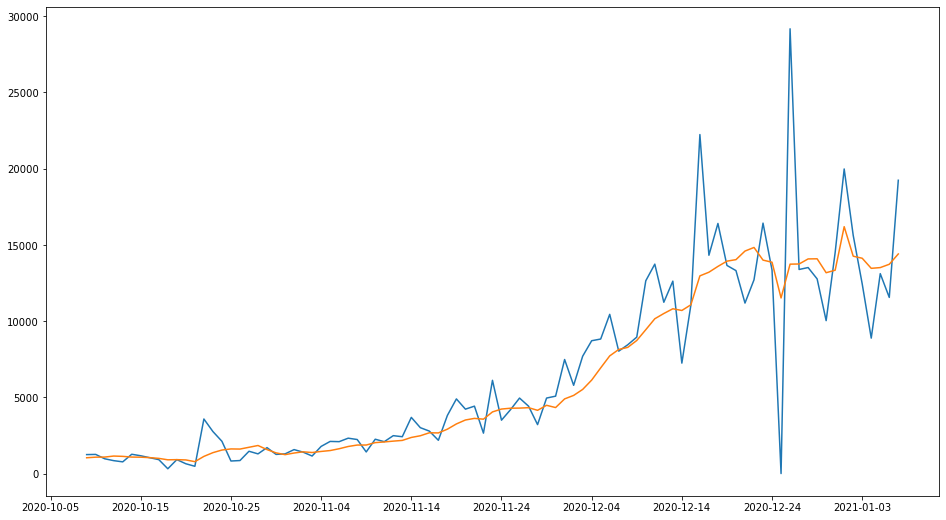

In [30]:
# los angeles county
fips_code = '06037'

plot_fips(fips_code, from_date, thru_date)

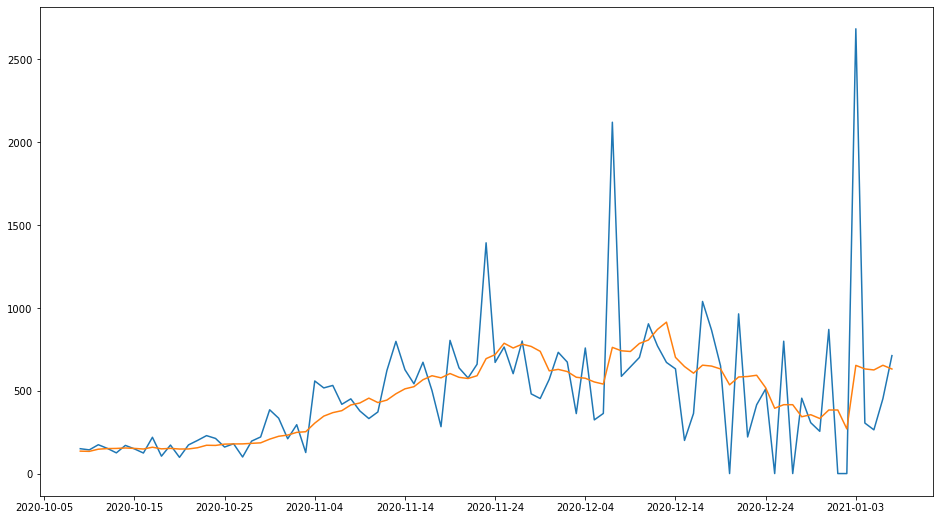

In [31]:
# king county
fips_code = '53033'

plot_fips(fips_code, from_date, thru_date)